In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
df=pd.read_csv("access to github.csv")

del df['Unnamed: 0']
df.head()

,build_token,origin,provider,ref,schema,spec,status,timestamp,version
0,1.0,gke.mybinder.org,GitHub,836c546b6f09c7a1ed5c48de0f4d7fb2abdc840a,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 17:59:00+00:00,5.0
1,1.0,gesis.mybinder.org,GitHub,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 18:37:00+00:00,5.0
2,1.0,gke.mybinder.org,GitHub,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 19:09:00+00:00,5.0
3,1.0,gke.mybinder.org,GitHub,84c5f24631dd042cc321159e3c04b2e3827e0180,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 21:02:00+00:00,5.0
4,1.0,gke.mybinder.org,GitHub,84c5f24631dd042cc321159e3c04b2e3827e0180,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 21:25:00+00:00,5.0


In [2]:
df

,build_token,origin,provider,ref,schema,spec,status,timestamp,version
0,1.0,gke.mybinder.org,GitHub,836c546b6f09c7a1ed5c48de0f4d7fb2abdc840a,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 17:59:00+00:00,5.0
1,1.0,gesis.mybinder.org,GitHub,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 18:37:00+00:00,5.0
2,1.0,gke.mybinder.org,GitHub,5782ee9f4b28d4ae47e14a2109cf3e34c178fc4b,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 19:09:00+00:00,5.0
3,1.0,gke.mybinder.org,GitHub,84c5f24631dd042cc321159e3c04b2e3827e0180,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 21:02:00+00:00,5.0
4,1.0,gke.mybinder.org,GitHub,84c5f24631dd042cc321159e3c04b2e3827e0180,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-02-01 21:25:00+00:00,5.0
...,...,...,...,...,...,...,...,...,...
1995,1.0,ovh.mybinder.org,GitHub,57311ad00840236b304e73320765663b3075d15e,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-11-07 02:56:00+00:00,5.0
1996,1.0,ovh.mybinder.org,GitHub,57311ad00840236b304e73320765663b3075d15e,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-11-07 03:06:00+00:00,5.0
1997,1.0,ovh.mybinder.org,GitHub,57311ad00840236b304e73320765663b3075d15e,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-11-07 18:29:00+00:00,5.0
1998,1.0,ovh.mybinder.org,GitHub,57311ad00840236b304e73320765663b3075d15e,binderhub.jupyter.org/launch,weix1996/lectures/HEAD,success,2022-11-07 20:43:00+00:00,5.0


In [3]:
i=0
date_time_list=[]
while i<len(df['timestamp']):
    date_time_list.append(df['timestamp'][i][:10])
    
    i=i+1
    if i%600==0:
        print(i)
dt=pd.to_datetime(date_time_list)
df['dt']=dt

df=df[['dt','version']]
df.head(5)

600
1200
1800


,dt,version
0,2022-02-01,5.0
1,2022-02-01,5.0
2,2022-02-01,5.0
3,2022-02-01,5.0
4,2022-02-01,5.0


In [4]:
value_counts=df.value_counts().to_list()
value_counts
dt_list=df['dt'].value_counts().index.to_list()
df2=pd.DataFrame()
df2['dt']=dt_list
df2['count']=value_counts
df2.sort_values(by='dt',inplace=True)

In [5]:
pd.to_datetime('2022-01-25')

Timestamp('2022-01-25 00:00:00')

In [6]:
r = pd.date_range(start=pd.to_datetime('2022-01-25'), end=df2.dt.max())
df2.set_index('dt')
df=df2.reindex(r,fill_value=0)


In [7]:
df.head()

,dt,count
2022-01-25,0,0
2022-01-26,0,0
2022-01-27,0,0
2022-01-28,0,0
2022-01-29,0,0


In [8]:
count_list=[]
for i in df.index.to_list():
    if i in dt_list:
        count_list.append(value_counts[dt_list.index(i)])
    else:
        count_list.append(0)
        
df['count']=count_list
df.head()

x1=df['count'].loc[:'2022-06-01'].copy()
x2=df['count'].loc['2022-08-15':].copy()

In [9]:
fall_months=['2022-09-01','2022-10-01','2022-11-01','2022-12-01']
fall_months_dt=[pd.to_datetime(i) for i in fall_months]
spring_months=['2022-02-01','2022-03-01','2022-04-01','2022-05-01','2022-06-01']
spring_months_dt=[pd.to_datetime(i) for i in spring_months]

hw_fall_days=['2022-09-06','2022-09-19','2022-09-28','2022-10-17']
hw_fall_days_dt=[pd.to_datetime(i) for i in hw_fall_days]

hw_spring_days=['2022-02-07','2022-02-14','2022-02-21',
                '2022-03-07','2022-03-28','2022-04-07',
                '2022-04-12','2022-05-02']
hw_spring_days_dt=[pd.to_datetime(i) for i in hw_spring_days]


hw_spring_extensions=['2022-03-31','2022-05-04']
hw_spring_extensions_dt=[pd.to_datetime(i) for i in hw_spring_extensions]


In [10]:
fall_months_dt

[Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00')]

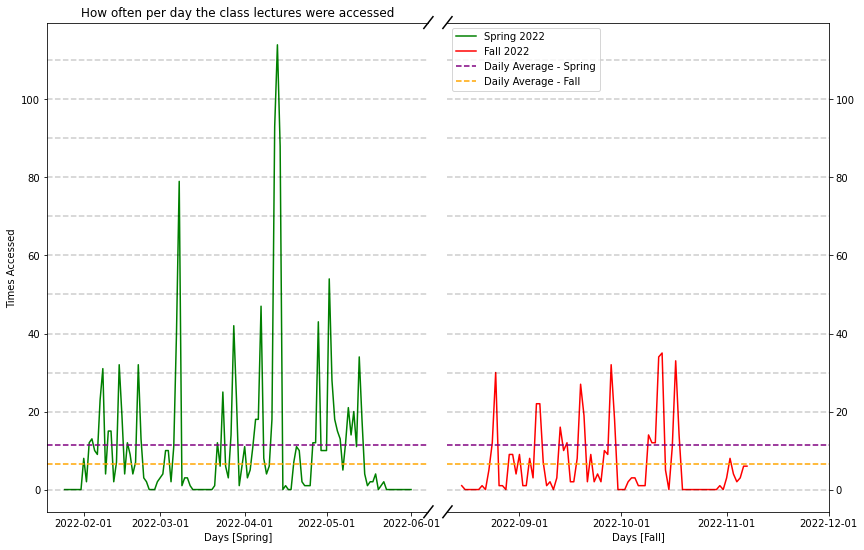

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, (ax,ax2) = plt.subplots(1,2,figsize=(14,9),sharey=True)
ax.plot(x1.index.to_list(),x1.to_list(),label="Spring 2022",color="green")
ax2.plot(color='green',label="Spring 2022")
ax2.plot(x2.index.to_list(),x2.to_list(),label="Fall 2022",color="red")


ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

d = .012 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

fig.subplots_adjust(wspace = 0.05)

#spring avg
ax2.axhline(y=x1.mean(),color="purple", label='Daily Average - Spring',linestyle='--' )
ax.axhline(y=x1.mean(),color="purple", linestyle='--' )

#fall avg
ax2.axhline(y=x2.mean(),color="orange", label='Daily Average - Fall ',linestyle='--' )
ax.axhline(y=x2.mean(),color="orange", linestyle='--' )

#guidelines
for i in range(0,120,10):
    if i==10:
        continue
    ax.axhline(y=i,color="black",linestyle="--",alpha=.2)
    ax2.axhline(y=i,color="black",linestyle="--",alpha=.2)
#creating the legend
handles,labels=ax.get_legend_handles_labels()
handles2,labels2=ax2.get_legend_handles_labels()
handles.extend(handles2)
plt.legend(handles=handles,loc='upper left')

ax.set_xlabel('Days [Spring]')        
ax2.set_xlabel('Days [Fall]')   
ax.set_ylabel('Times Accessed')

#creating the legend
handles,labels=ax.get_legend_handles_labels()
handles2,labels2=ax2.get_legend_handles_labels()
handles.extend(handles2)
plt.legend(handles=handles,loc='upper left')

ax.set_title('How often per day the class lectures were accessed')
ax2.set_xticks(fall_months)
ax.set_xticks(spring_months)


ax.set_xlabel('Days [Spring]')        
ax2.set_xlabel('Days [Fall]')   
ax.set_ylabel('Times Accessed')

plt.show()

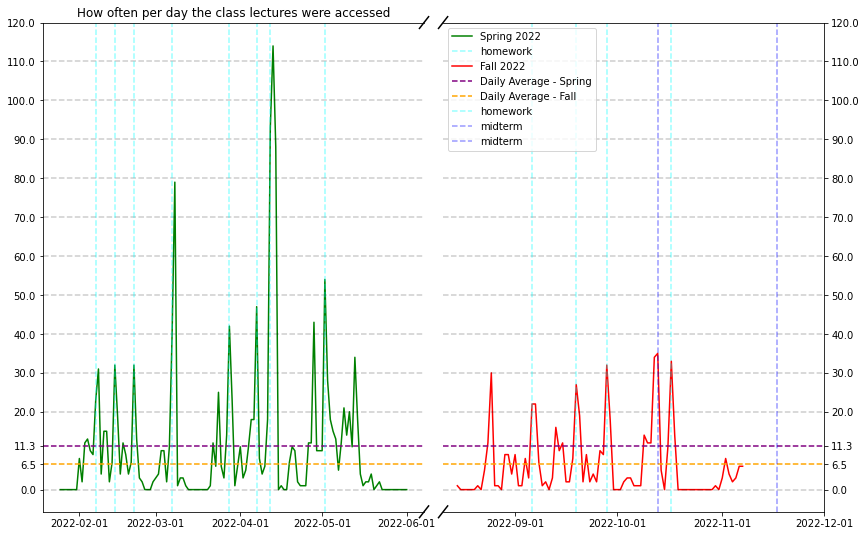

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, (ax,ax2) = plt.subplots(1,2,figsize=(14,9),sharey=True,sharex=False)
ax.plot(x1.index.to_list(),x1.to_list(),label="Spring 2022",color="green")
ax2.plot(color='green',label="Spring 2022")
ax2.plot(x2.index.to_list(),x2.to_list(),label="Fall 2022",color="red")


ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

d = .012 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

fig.subplots_adjust(wspace = 0.05)

#spring avg
ax2.axhline(y=x1.mean(),color="purple", label='Daily Average - Spring',linestyle='--' )
ax.axhline(y=x1.mean(),color="purple", linestyle='--' )

#fall avg
ax2.axhline(y=x2.mean(),color="orange", label='Daily Average - Fall ',linestyle='--' )
ax.axhline(y=x2.mean(),color="orange", linestyle='--' )

#guidelines
for i in range(0,120,10):
    if i==10:
        continue
    ax.axhline(y=i,color="black",linestyle="--",alpha=.2)
    ax2.axhline(y=i,color="black",linestyle="--",alpha=.2)

ax.set_title('How often per day the class lectures were accessed')
ax.set_xticks(spring_months)
ax2.set_xticks(fall_months)
ax.set_yticks([0,x1.mean(),x2.mean(),20,30,40,50,60,70,80,90,100,110,120])
ax2.set_yticks([0,x1.mean(),x2.mean(),20,30,40,50,60,70,80,90,100,110,120])

#homework days

for i in hw_fall_days[1:]:
    ax2.axvline(x=pd.to_datetime(i), color='cyan',linestyle='--',alpha=.4)
ax2.axvline(x=pd.to_datetime(hw_fall_days[0]), color='cyan',linestyle='--',alpha=.4,label='homework')

for i in hw_spring_days[1:]:
    ax.axvline(x=pd.to_datetime(i), color='cyan',linestyle='--',alpha=.4)
ax.axvline(x=pd.to_datetime(hw_spring_days[0]), color='cyan',linestyle='--',alpha=.4,label='homework')



#midterm
ax2.axvline(x=pd.to_datetime('2022-10-13'), color='blue',linestyle='--',alpha=.4,label='midterm')
ax2.axvline(x=pd.to_datetime('2022-11-17'), color='blue',linestyle='--',alpha=.4,label='midterm')


#creating the legend
handles,labels=ax.get_legend_handles_labels()
handles2,labels2=ax2.get_legend_handles_labels()
handles.extend(handles2)
plt.legend(handles=handles,loc='upper left')

plt.show()

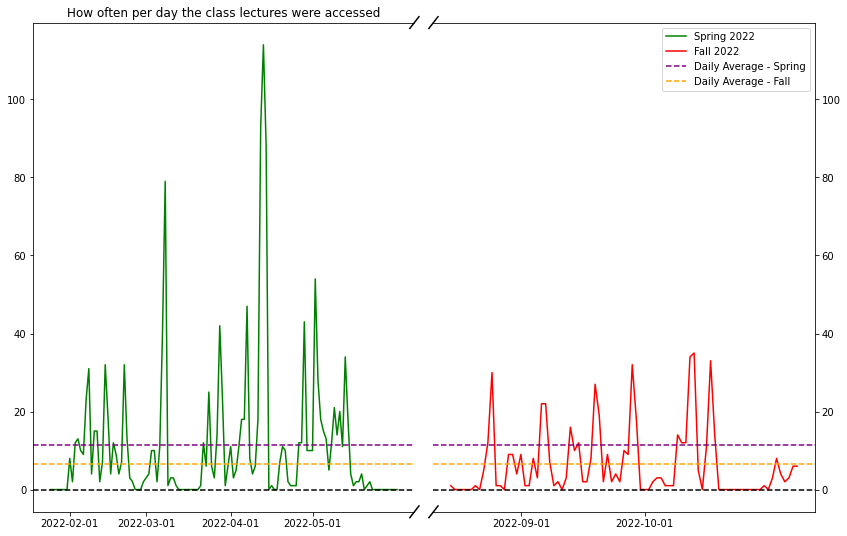

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#colors = ["green", "red","purple","orange"]
#texts = ["Spring 2022", " Fall 2022","Spring 2022 average access/day","Fall 2022 average access/day"]

fig, (ax,ax2) = plt.subplots(1,2,figsize=(14,9),sharey=True)
ax.plot(x1.index.to_list(),x1.to_list(),label="Spring 2022",color="green")
ax2.plot(color='green',label="Spring 2022")
ax2.plot(x2.index.to_list(),x2.to_list(),label="Fall 2022",color="red")


ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()

d = .012 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

fig.subplots_adjust(wspace = 0.05)


#spring avg
ax2.axhline(y=x1.mean(),color="purple", label='Daily Average - Spring',linestyle='--' )
ax.axhline(y=x1.mean(),color="purple", linestyle='--' )


#fall avg
ax2.axhline(y=x2.mean(),color="orange", label='Daily Average - Fall ',linestyle='--' )
ax.axhline(y=x2.mean(),color="orange", linestyle='--' )


# line at y=0
ax.axhline(y=0,color="black",linestyle="--")
ax2.axhline(y=0,color="black",linestyle="--")



ax.set_title('How often per day the class lectures were accessed')
ax.set_xticks(['2022-02-01','2022-03-01','2022-04-01','2022-05-01'])
ax2.set_xticks(['2022-09-01','2022-10-01',]) #'2022-11-01','2022-12-01'])


#creating the legend
handles,labels=ax.get_legend_handles_labels()
handles2,labels2=ax2.get_legend_handles_labels()
handles.extend(handles2)
plt.legend(handles=handles,loc='upper right')



plt.show()

In [14]:
a1_list=[]
a2_list=[]
for a1,b1 in enumerate(x1.to_list()):
    a1_list.append(a1)

for a2,b2 in enumerate(x2.to_list()):
    a2_list.append(a2)


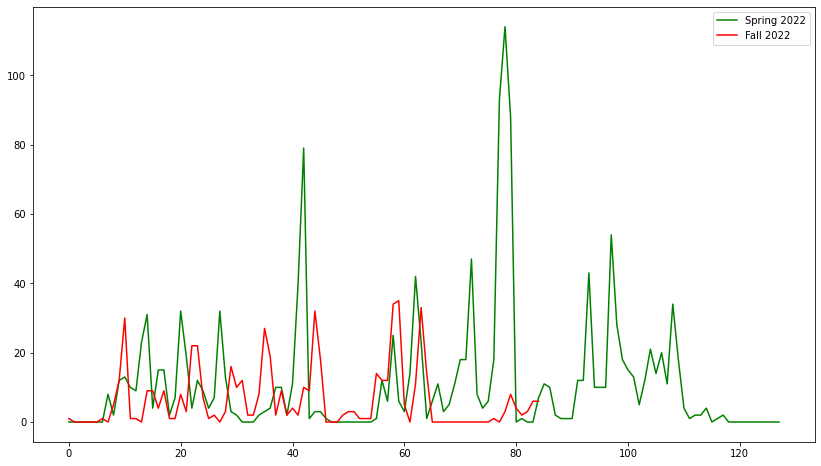

In [15]:
fig,ax=plt.subplots(figsize=(14,8))


ax.plot(a1_list,x1.to_list(),label="Spring 2022",color="green")
ax.plot(a2_list,x2.to_list(),label="Fall 2022",color="red")

ax.legend()
plt.show()